In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [22]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('agr.csv')

In [23]:
# Xử lý dữ liệu
prices = data['Price']

In [24]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [25]:
scaled_prices

array([[0.15529524],
       [0.14823492],
       [0.14862937],
       ...,
       [0.54325843],
       [0.54525062],
       [0.54724281]])

In [26]:
#RATIO 91

In [27]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [28]:
test_data

array([[0.74509523],
       [0.74901984],
       [0.72548809],
       [0.69215475],
       [0.69607538],
       [0.7       ],
       [0.70980158],
       [0.70980158],
       [0.71764682],
       [0.72352777],
       [0.72548809],
       [0.71764682],
       [0.71176189],
       [0.69803968],
       [0.70196032],
       [0.69411507],
       [0.69215475],
       [0.69803968],
       [0.75294047],
       [0.72940872],
       [0.7274484 ],
       [0.70588095],
       [0.68823412],
       [0.63921428],
       [0.65882142],
       [0.64705953],
       [0.61764682],
       [0.56862698],
       [0.5274484 ],
       [0.52548809],
       [0.52548809],
       [0.52156746],
       [0.48039286],
       [0.49411507],
       [0.50588095],
       [0.50980158],
       [0.51372619],
       [0.5       ],
       [0.49411507],
       [0.45490079],
       [0.41764682],
       [0.44313491],
       [0.43725396],
       [0.40196032],
       [0.36862698],
       [0.37254761],
       [0.40392063],
       [0.409

In [29]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [30]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [31]:
X_train.shape

(1011, 30, 1)

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [34]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
16/16 [==============================] - 1s 867us/step - loss: 0.0245
Epoch 2/100
16/16 [==============================] - 0s 934us/step - loss: 0.0035
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 4/100
16/16 [==============================] - 0s 933us/step - loss: 0.0012
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 9.2444e-04
Epoch 6/100
16/16 [==============================] - 0s 934us/step - loss: 8.1845e-04
Epoch 7/100
16/16 [==============================] - 0s 867us/step - loss: 6.9098e-04
Epoch 8/100
16/16 [==============================] - 0s 934us/step - loss: 6.0360e-04
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 5.4810e-04
Epoch 10/100
16/16 [==============================] - 0s 934us/step - loss: 4.2741e-04
Epoch 11/100
16/16 [==============================] - 0s 867us/step - loss: 3.6411e-04
Epoch 12/100
16/16 [==============================] - 0s 933us/step - loss

In [15]:
data.index


RangeIndex(start=0, stop=1488, step=1)

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

13/13 [==============================] - 0s 749us/step
[[1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]
 [1516]
 [1517]
 [1518]]
1/1 [==============================] - 0s 47ms/step
[13520.688 13714.041 13865.015 14211.628 14764.396 15222.364 15563.952
 15638.095 15576.311 15476.433 15764.614 15346.898 15918.868 16041.513
 16680.203 15560.389 16064.056 15440.7   15481.048 15932.273 15929.052
 15869.222 16833.25  17041.969 17571.945 16933.34  16780.09  16392.998
 16619.74  16258.733]


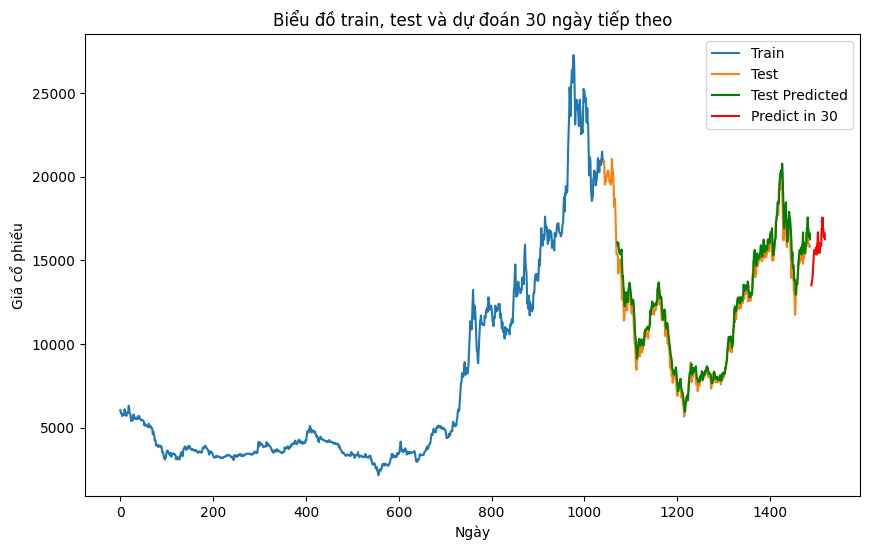

In [35]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




13/13 [==============================] - 0s 750us/step


In [37]:
y_test1

array([[15354. ],
       [15255.6],
       [14222.2],
       [14566.6],
       [14861.9],
       [14960.3],
       [15058.8],
       [14714.3],
       [14566.6],
       [13582.4],
       [12647.4],
       [13287.1],
       [13139.5],
       [12253.7],
       [11417.1],
       [11515.5],
       [12302.9],
       [12450.5],
       [12450.5],
       [12499.8],
       [12007.6],
       [12106.1],
       [12598.2],
       [12942.7],
       [12893.5],
       [13090.3],
       [12844.2],
       [12745.8],
       [12499.8],
       [12204.5],
       [12106.1],
       [11810.8],
       [12204.5],
       [12598.2],
       [12106.1],
       [11269.5],
       [10777.4],
       [10039.2],
       [10039.2],
       [ 9340.4],
       [ 8690.8],
       [ 8464.4],
       [ 8976.2],
       [ 9054.9],
       [ 9389.6],
       [ 9842.3],
       [ 9793.1],
       [ 9822.6],
       [ 9261.6],
       [ 9645.5],
       [10236. ],
       [ 9990. ],
       [ 9645.5],
       [ 9497.8],
       [ 9842.3],
       [ 9

In [38]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 3.866
MAE: 433.692
RMSE: 592.338
MSLE: 0.051
-------------------
